In [ ]:
import numpy as np # Linear algebra library
import matplotlib.pyplot as plt # library for visualization
from sklearn.decomposition import PCA # PCA library
import pandas as pd # Data frame library
import math # Library for math functions
import random # Library for pseudo random numbers
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


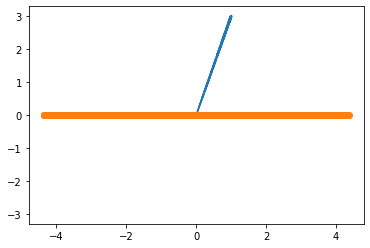

In [ ]:
n = 1 # The amount of the correlation
x = np.random.uniform(1,3,1000) # Generate 1000 samples from a uniform random variable
y = x.copy() * 3 # Make y = n * x
z = y.copy() *2

# PCA works better if the data is centered
x = x - np.mean(x) # Center x. Remove its mean
y = y - np.mean(y) # Center y. Remove its mean
z=z-np.mean(z)

data = pd.DataFrame({'x': x, 'y': y, 'z':y}) # Create a data frame with x and y
plt.scatter(data.x, data.y,data.z) # Plot the original correlated data in blue

pca = PCA(n_components=2) # Instantiate a PCA. Choose to get 2 output variables

# Create the transformation model for this data. Internally, it gets the rotation
# matrix and the explained variance
pcaTr = pca.fit(data)

rotatedData = pcaTr.transform(data) # Transform the data base on the rotation matrix of p

# # Create a data frame with the new variables. We call these new variables PC1 and PC2
dataPCA = pd.DataFrame(data = rotatedData, columns = ['PC1', 'PC3'])

# Plot the transformed data in orange
plt.scatter(dataPCA.PC1, dataPCA.PC3)
plt.show()

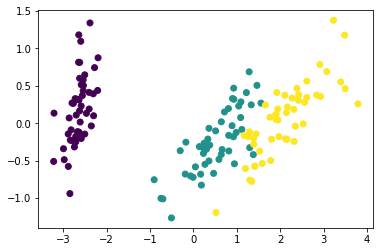

In [ ]:
iris=datasets.load_iris()
X=iris.data
y=iris.target

X.shape
y.shape
#Reducing the dimensions from 4->2 
pca=PCA(n_components=2)
pca.fit(X)
pca.components_
Z=pca.transform(X)
Z.shape
plt.scatter(Z[:,0],Z[:,1],c=y)

In [ ]:
iris=datasets.load_iris()
X=iris.data
y=iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test = sc.transform(X_test)

pca=PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

variance=pca.explained_variance_ratio_

pca=PCA(n_components=2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
confusion_matrix(y_test,y_pred)
precision=precision_score(y_test,y_pred,pos_label='positive',average='micro')
print("Precision: ",precision)
print("Accuracy using PCA: ",accuracy_score(y_test,y_pred)*100)

Precision:  0.8
Accuracy using PCA:  80.0


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,


In [ ]:
iris=datasets.load_iris()
X=iris.data
y=iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
gnb=GaussianNB()
gnb.fit(X_train,y_train)

y_pred=gnb.predict(X_test)
precision=precision_score(y_test,y_pred,pos_label='positive',average='micro')
print("Precision: ",precision)
print("Accuracy without PCA: ",accuracy_score(y_test, y_pred)*100)

Precision:  0.9666666666666667
Accuracy without PCA:  96.66666666666667


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
